In [2]:
import nicepy as npy
from nicepy import u
from scipy import integrate
from nicepy import beam
from scipy import special
import matplotlib.ticker as tck

%matplotlib inline

# Capture Theory

## effective potential

In [3]:
def V_eff(r, a, b):
    output = a/r**2 - b/r**4
    return output

No handles with labels found to put in legend.


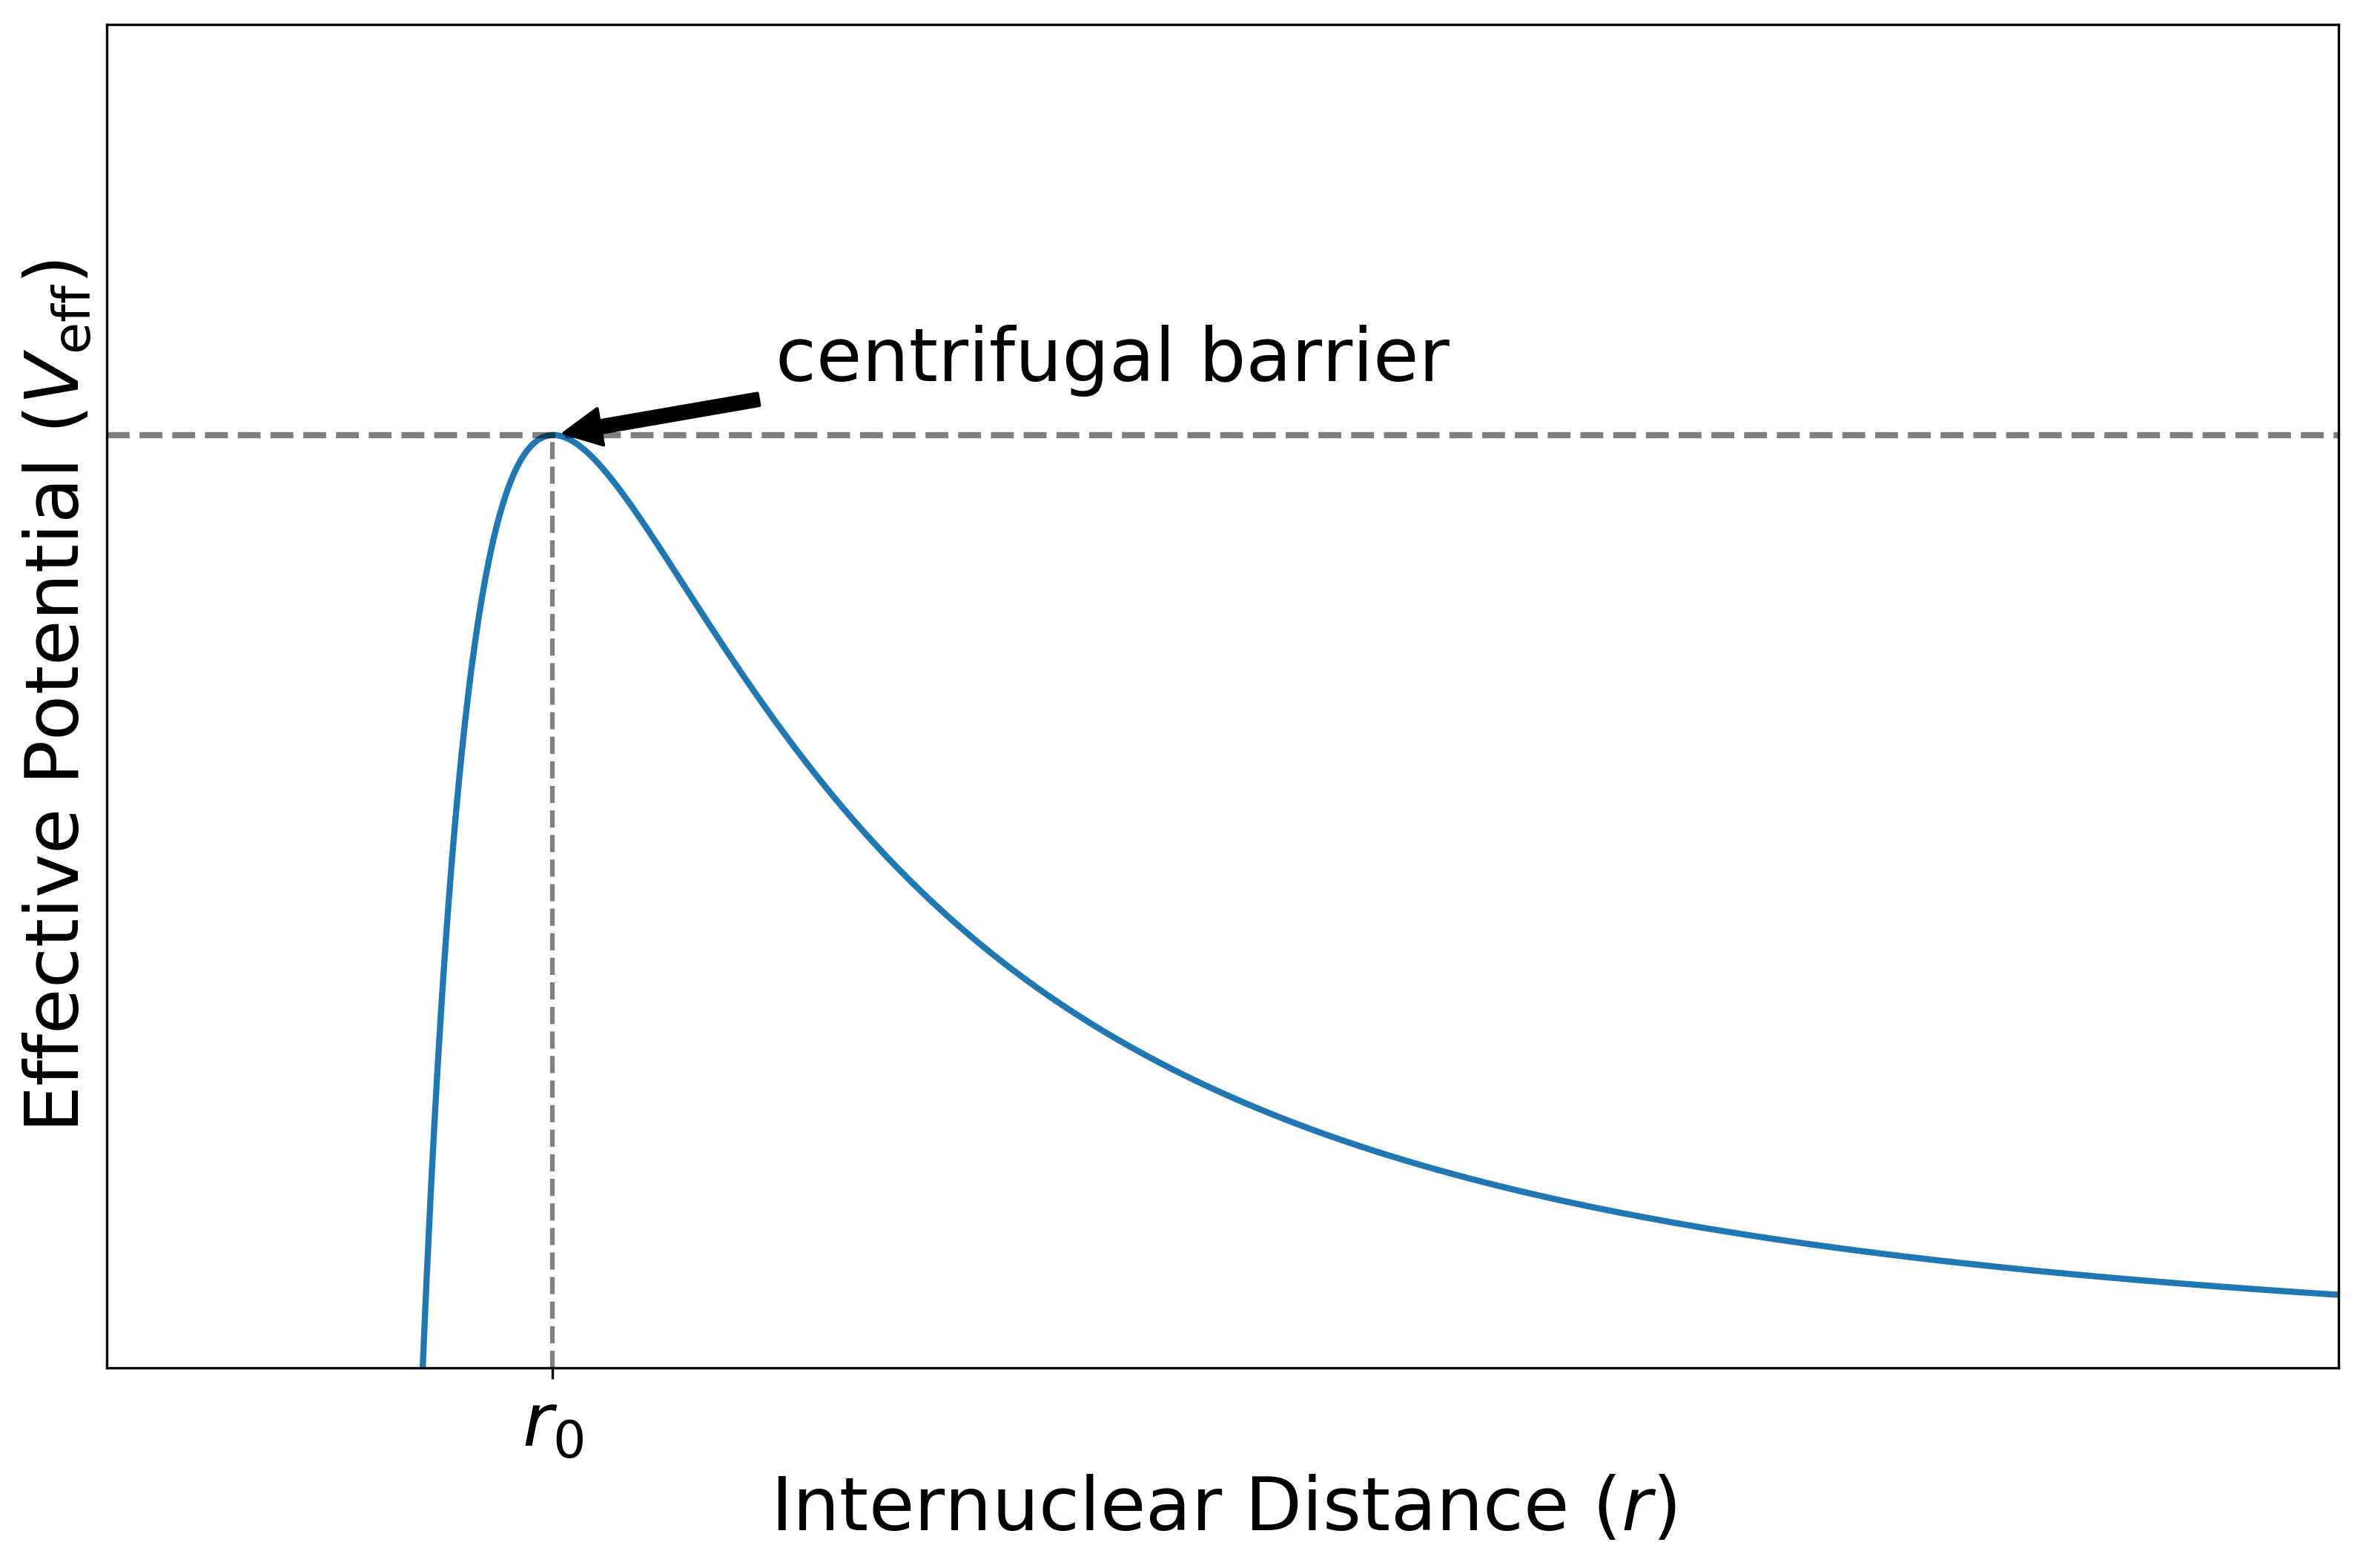

In [4]:
r = np.linspace(1.3, 10, 1000)
veff = V_eff(r, 10, 20)

max_veff = max(veff)
r_0 = r[veff == max_veff]

fig, ax = plt.subplots()
ax.plot(r, V_eff(r, 10, 20))
ax.set_xlabel('Internuclear Distance ($r$)')
ax.set_ylabel('Effective Potential ($V_{\mathrm{eff}}$)')
ax.axhline(max_veff, linestyle='--', color='k', alpha=0.5)
ax.vlines(r_0, ymin=0, ymax=max_veff, linestyle='--', color='k', alpha=0.5)
ax.set_ylim(0, 1.8)
ax.set_xlim(0, 10)
# ax.set_xticks([])
ax.set_yticks([])
ax.set_xticks(r_0)
ax.set_xticklabels(['$r_0$'])
# ax.text(0.05, 0.3, 'short range', fontsize=24, rotation=90, transform=ax.transAxes)
# ax.text(0.8, 0.3, 'long range', fontsize=24, transform=ax.transAxes)
ax.annotate('centrifugal barrier', (r_0, max_veff), (r_0+1, max_veff+0.1), fontsize=24, verticalalignment='center', arrowprops=dict(facecolor='black', shrink=0.05))
# ax.grid()

npy.format_fig(fig)
npy.format_ax(ax)
fig.savefig('v_eff.png', bbox_inches='tight')

## $\bar{\theta}$

In [7]:
def A(phi):
    a = 0.5
    top = a**2 * np.cos(phi)**2
    bot = np.sqrt(1 - a**2 * np.sin(phi)**2)
    
    return top/bot

def theta1(K):
    a = integrate.quad(A, 0, np.pi/2)[0]
    top = 2 * np.sqrt(2) * a
    bot = np.sqrt(1 - np.cos(K))
    
    output = top/bot
    
    return np.array(output)

class theta2:
    
    def __init__(self, alpha):
        self.alpha = alpha
        
    def top(self, theta):
        top = theta * np.sin(theta)
        bot = np.sqrt(self.alpha + np.cos(theta))

        output = top/bot

        return output

    def bot(self, theta):
        top = np.sin(theta)
        bot = np.sqrt(self.alpha + np.cos(theta))

        output = top/bot

        return output

def theta2_E(alpha):
    output = []
    for a in alpha:
        t2 = theta2(a)
        top = integrate.quad(t2.top, 0, np.pi)[0]
        bot = integrate.quad(t2.bot, 0, np.pi)[0]
        output.append(top/bot)
    
    return np.array(output)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


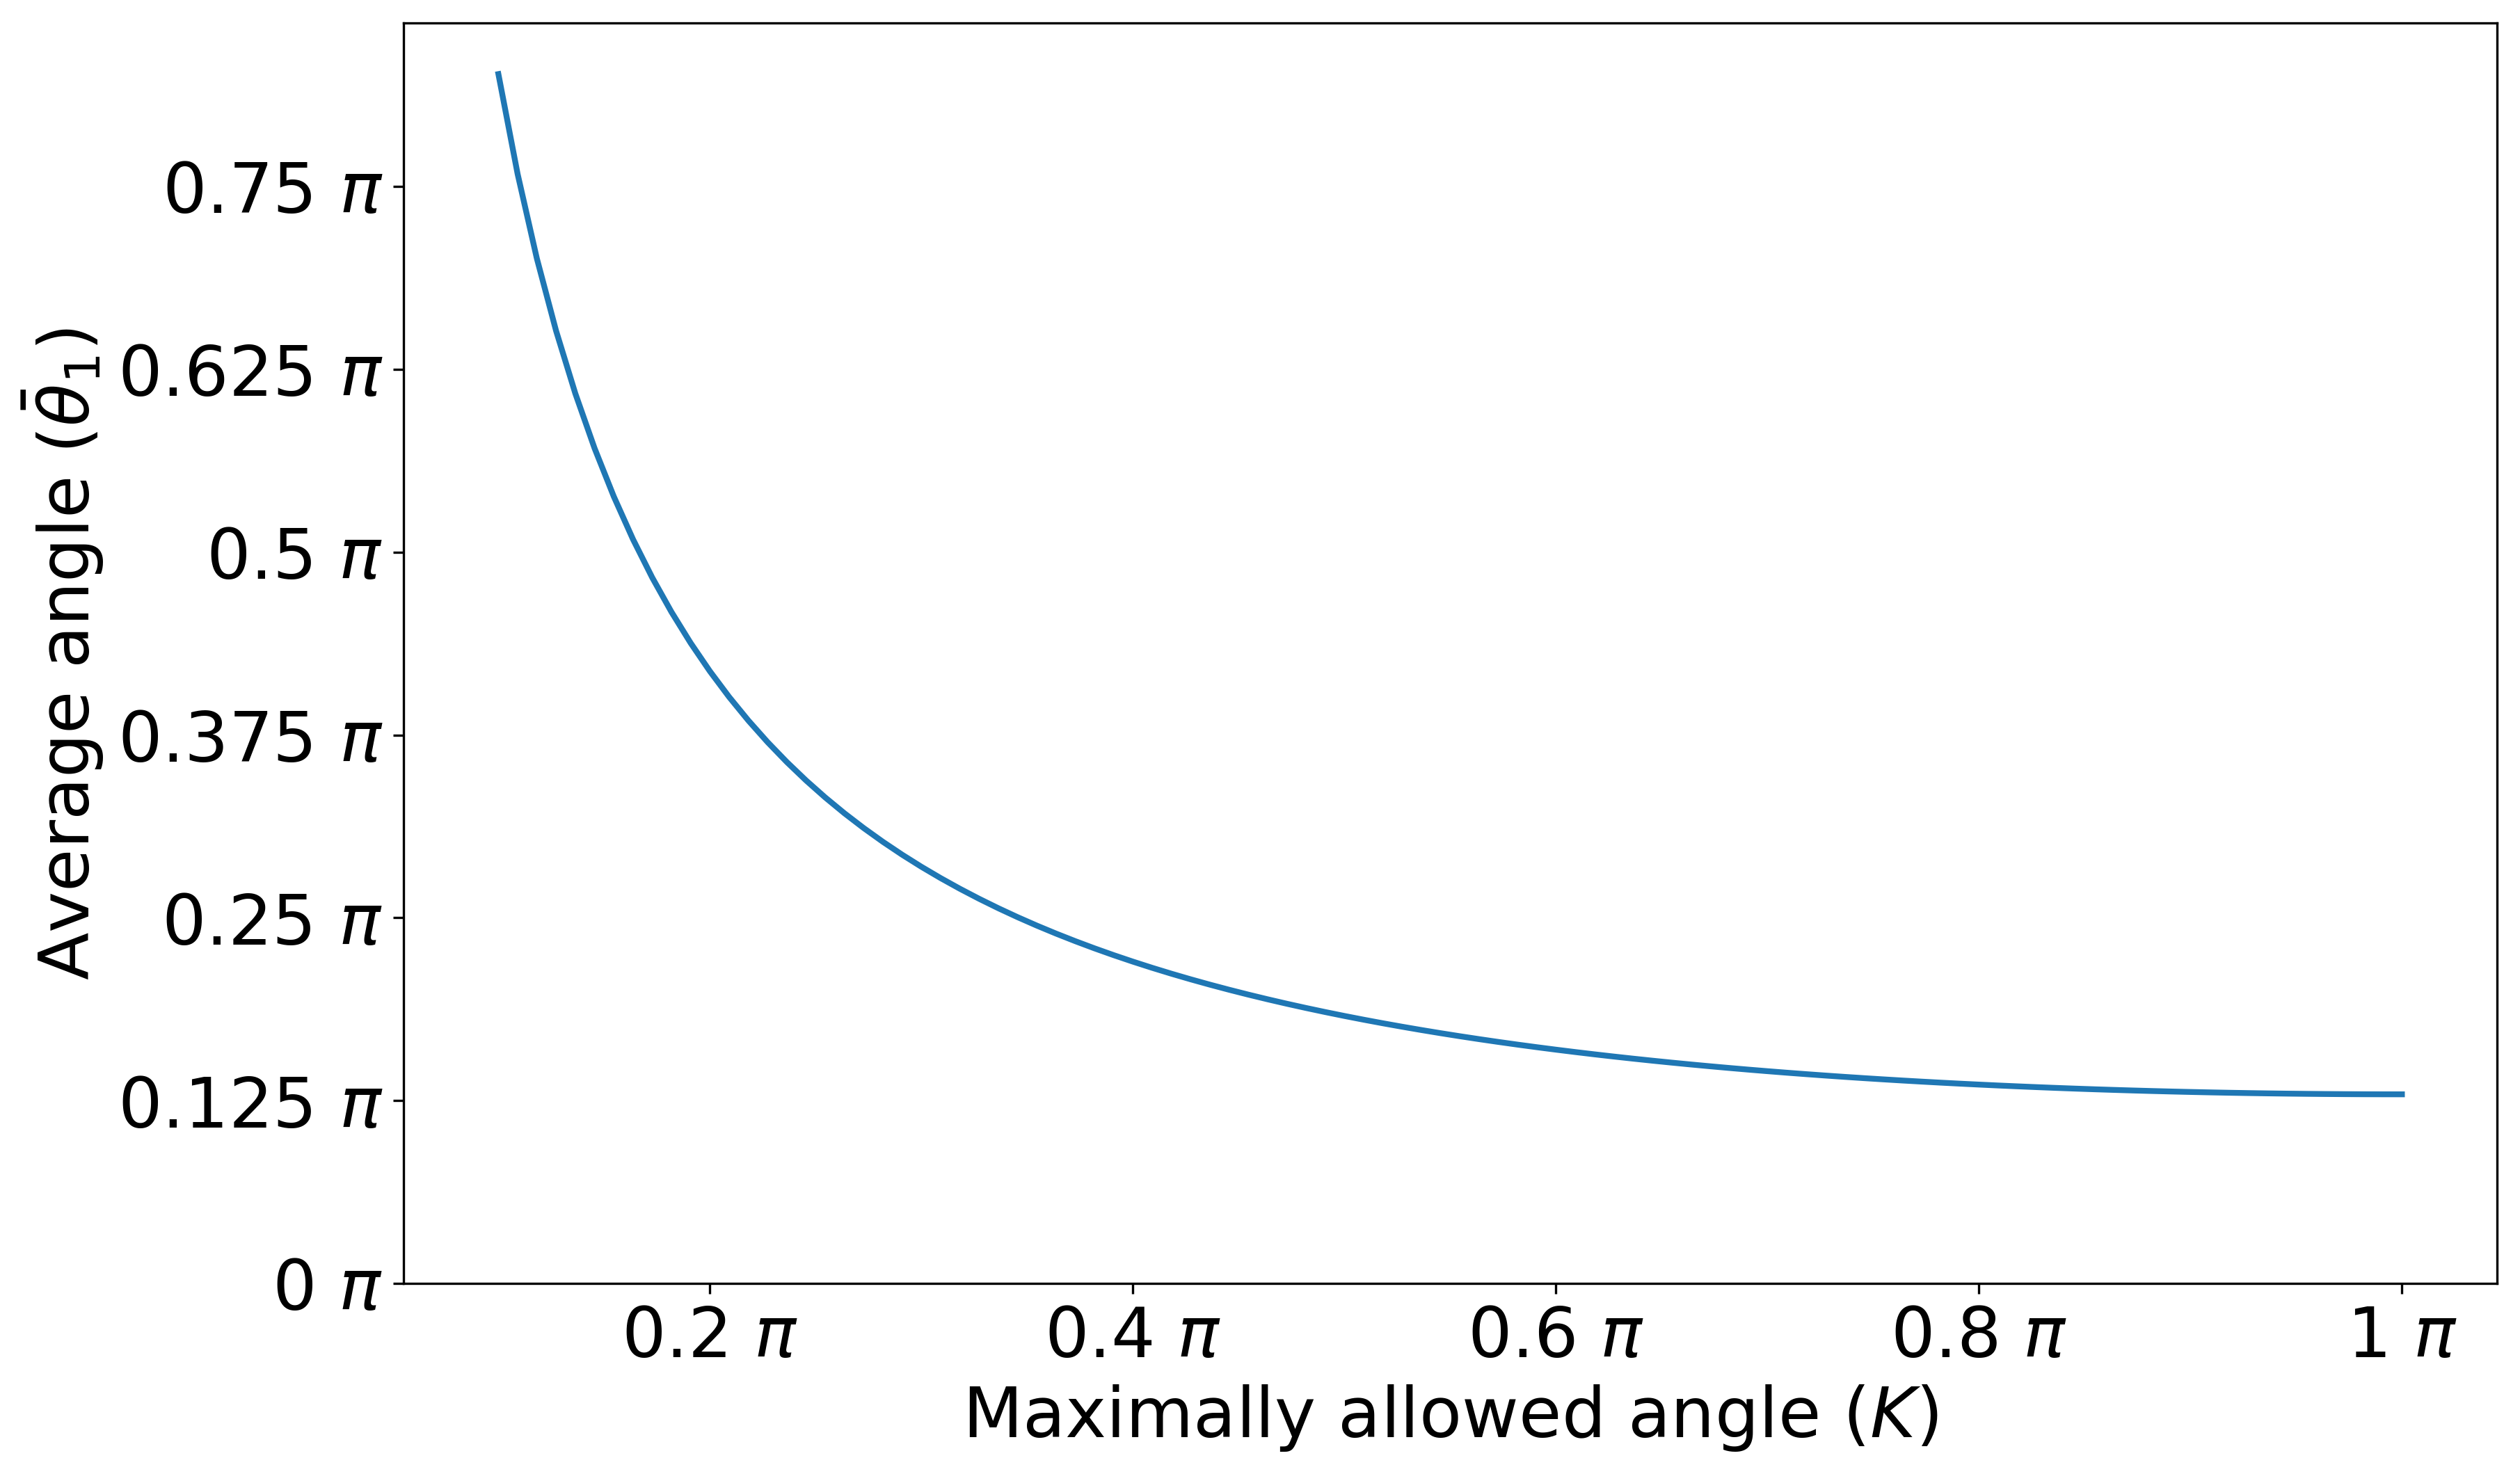

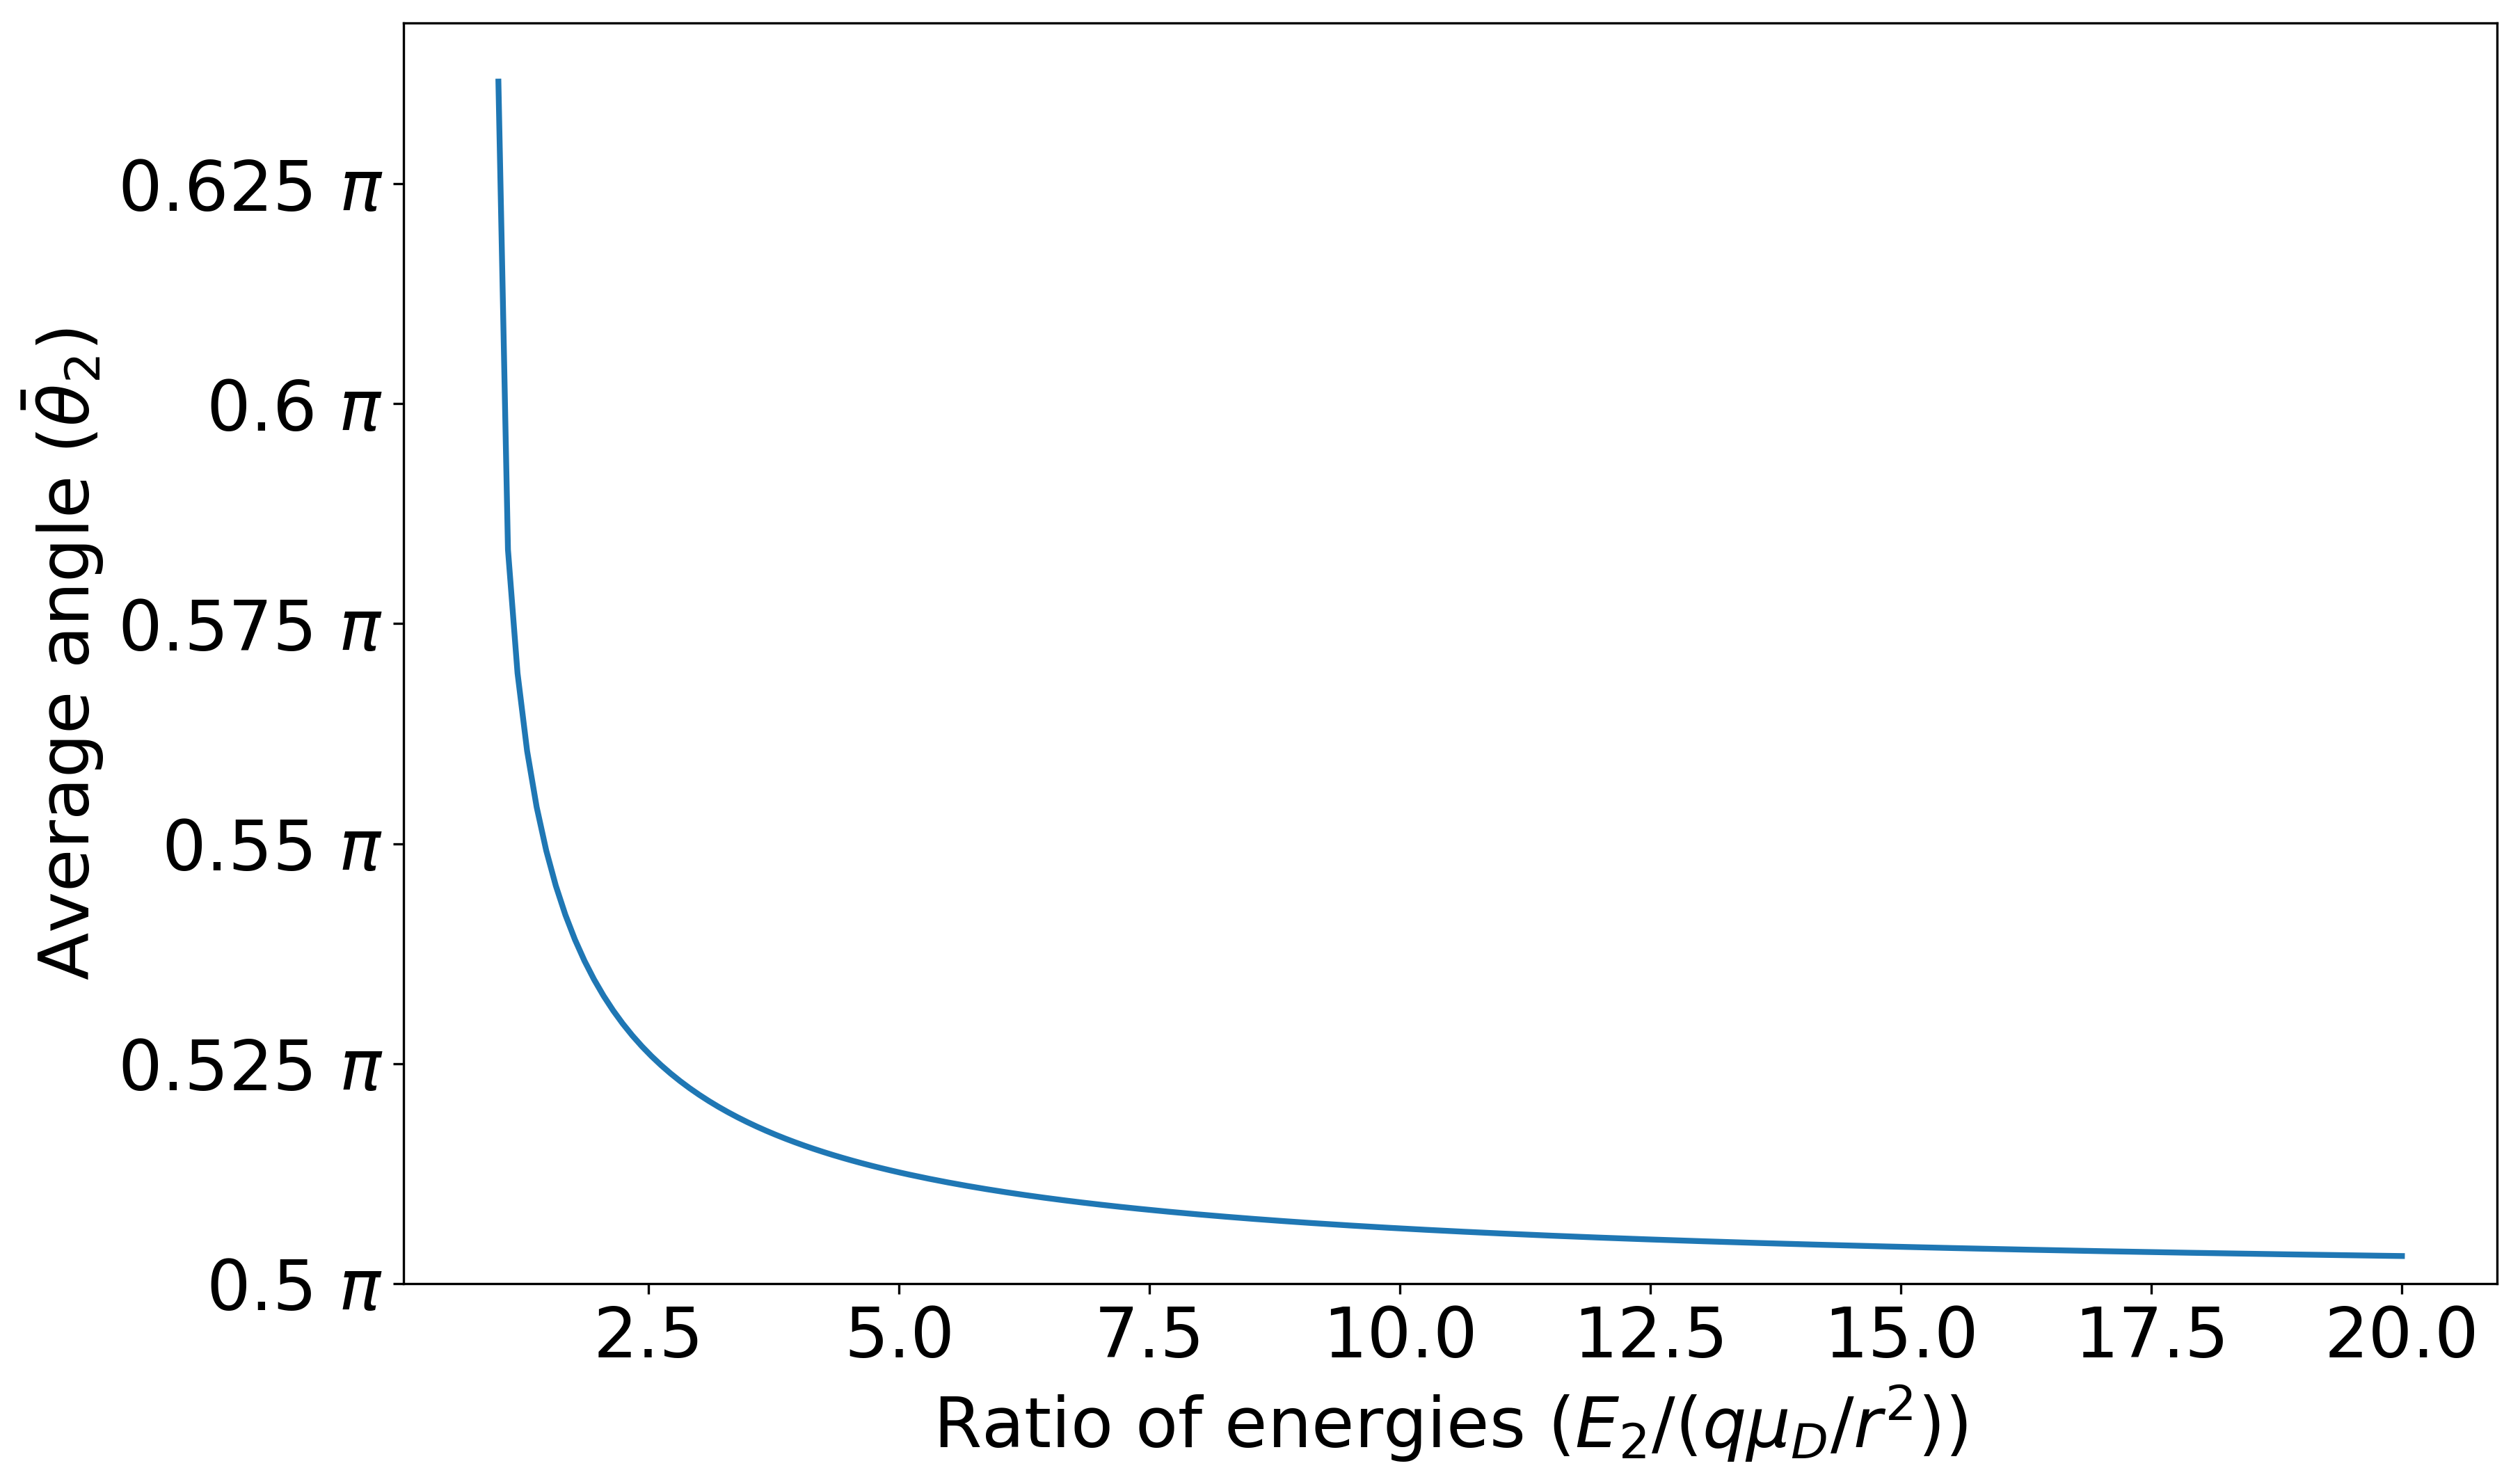

In [30]:
x = np.linspace(np.pi/10, np.pi, 100)

fig, ax = plt.subplots()

ax.plot(x/np.pi, theta1(x)/np.pi)

ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=0.125))
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.2))

ax.set_ylabel('Average angle ($\\bar{\\theta}_1$)')
ax.set_xlabel('Maximally allowed angle ($K$)')
ax.set_ylim(0)
# ax.text(0.5, 0.66, '$\\bar{\\theta}_1 = \\frac{2 \sqrt{2}A}{\sqrt{1-\cos(K)}}$', fontsize=36, transform=ax.transAxes)

npy.format_fig(fig)
npy.format_ax(ax)
fig.savefig('ADO_theta1.png', bbox_inches='tight')

x = np.linspace(1, 20, 200)

fig, ax = plt.subplots()

ax.plot(x, theta2_E(x)/np.pi)

ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=0.025))

ax.set_ylabel('Average angle ($\\bar{\\theta}_2$)')
ax.set_xlabel('Ratio of energies ($E_2/(q \\mu_D/r^2)$)')
ax.set_ylim(0.5)
# ax.text(0.5, 0.66, eq, fontsize=36, transform=ax.transAxes)

npy.format_fig(fig)
npy.format_ax(ax)
fig.savefig('ADO_theta2.png', bbox_inches='tight')

## Proton Affinities

In [11]:
l = np.array([422, 424, 425, 427, 490, 495, 496, 531, 548, 552, 564, 569, 571, 594])
m = l/96.485
pd.DataFrame([l,m]).T.round(2)

,0,1
0,422.0,4.37
1,424.0,4.39
2,425.0,4.40
3,427.0,4.43
4,490.0,5.08
5,495.0,5.13
6,496.0,5.14
7,531.0,5.50
8,548.0,5.68
9,552.0,5.72
